# Proyek Analisis Data: Bike Sharing Dataset

## Menentukan Pertanyaan Bisnis

Dalam proyek ini, kita akan menganalisis dataset Bike Sharing untuk menjawab tiga pertanyaan bisnis utama:

1. Bagaimana pola penggunaan sepeda berdasarkan waktu (musim, hari, jam) dan faktor cuaca?
2. Apa perbedaan karakteristik antara pengguna casual dan registered dalam sistem bike sharing?

## Import Semua Packages/Library yang Digunakan

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## Data Loading dan Persiapan Awal

Pada tahap ini, kita akan memuat dataset yang sudah dibersihkan sebelumnya dan melakukan persiapan data untuk analisis.

In [29]:
# Membaca dataset yang sudah dibersihkan
hour_df = pd.read_csv('cleaned_hour.csv')
day_df = pd.read_csv('cleaned_day.csv')

# Mengonversi kolom dteday ke tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Membuat nama bulan dari tanggal untuk visualisasi lebih jelas
day_df['month'] = day_df['dteday'].dt.month_name()
hour_df['month'] = hour_df['dteday'].dt.month_name()

# Memastikan format weekday_name benar
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df['weekday_name'] = pd.Categorical(day_df['weekday_name'], categories=weekday_order, ordered=True)
hour_df['weekday_name'] = pd.Categorical(hour_df['weekday_name'], categories=weekday_order, ordered=True)

# Melihat informasi dataset
print("Informasi Dataset Hour:")
print(f"Jumlah baris: {hour_df.shape[0]}, Jumlah kolom: {hour_df.shape[1]}")
print("\nInformasi Dataset Day:")
print(f"Jumlah baris: {day_df.shape[0]}, Jumlah kolom: {day_df.shape[1]}")

# Menampilkan beberapa data awal
print("\nSampel Data Hour:")
display(hour_df.head(3))
print("\nSampel Data Day:")
display(day_df.head(3))

Informasi Dataset Hour:
Jumlah baris: 17379, Jumlah kolom: 25

Informasi Dataset Day:
Jumlah baris: 731, Jumlah kolom: 23

Sampel Data Hour:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,cnt,season_name,weather_name,weekday_name,time_of_day,casual_ratio,log_casual,log_registered,log_cnt,month
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,16,Spring,Clear,Saturday,Night/Early Morning,0.18750,1.386294,2.639057,2.833213,January
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,40,Spring,Clear,Saturday,Night/Early Morning,0.20000,2.197225,3.496508,3.713572,January
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,32,Spring,Clear,Saturday,Night/Early Morning,0.15625,1.791759,3.332205,3.496508,January



Sampel Data Day:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,season_name,weather_name,weekday_name,casual_ratio,log_casual,log_registered,log_cnt,month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,654,985.0,Spring,Mist,Saturday,0.336041,5.805135,6.484635,6.893656,January
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,670,801.0,Spring,Mist,Sunday,0.163546,4.882802,6.508769,6.687109,January
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1229,1349.0,Spring,Clear,Monday,0.088955,4.795791,7.114769,7.207860,January


## Exploratory Data Analysis (EDA)

Sebelum menjawab pertanyaan bisnis, mari kita lakukan eksplorasi data untuk memahami karakteristik umum dataset.

Statistik deskriptif untuk jumlah penggunaan sepeda:


,casual,registered,cnt
count,731.000000,731.000000,731.000000
mean,824.388509,3656.172367,4480.560876
std,623.642956,1560.256377,1905.464483
min,2.000000,20.000000,22.000000
25%,315.500000,2497.000000,3152.000000
50%,713.000000,3662.000000,4548.000000
75%,1096.000000,4776.500000,5893.500000
max,2266.750000,6946.000000,8232.750000


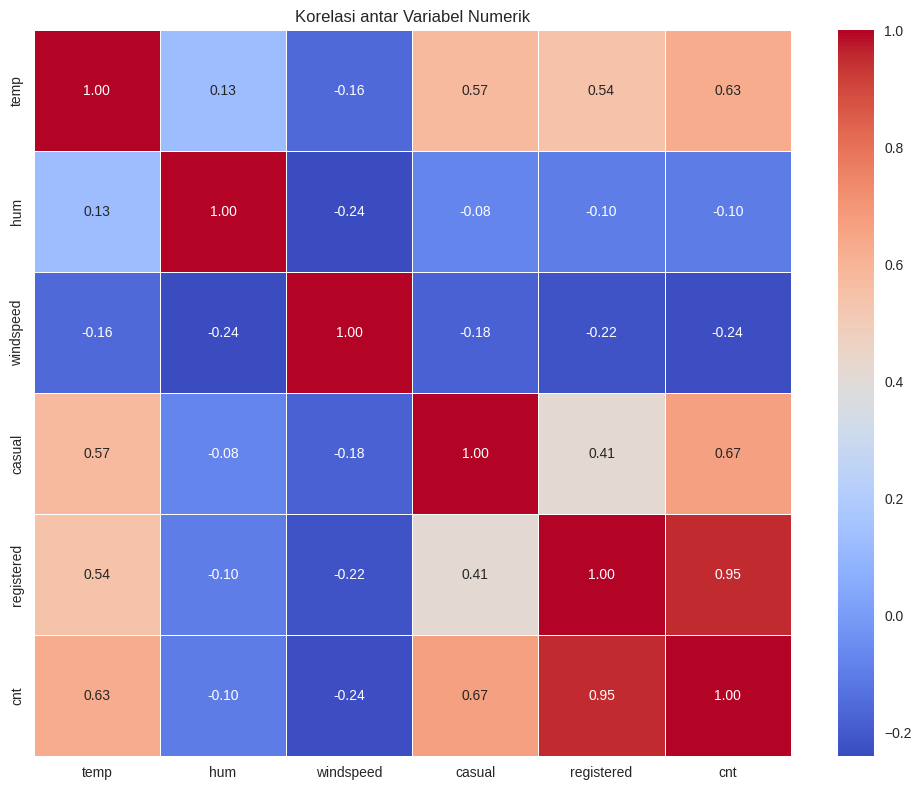

In [30]:
# Statistik deskriptif untuk variabel utama
print("Statistik deskriptif untuk jumlah penggunaan sepeda:")
descriptive_stats = day_df[['casual', 'registered', 'cnt']].describe()
display(descriptive_stats)

# Melihat korelasi antar variabel numerik
correlation = day_df[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antar Variabel Numerik')
plt.tight_layout()
plt.show()

**Pemilihan Diagram: Heatmap Korelasi**

Untuk memahami hubungan antar variabel numerik, saya menggunakan **heatmap korelasi** dengan alasan:

1. **Efisiensi Informasi:** Heatmap menampilkan matriks korelasi secara visual, memungkinkan kita melihat hubungan antara semua pasangan variabel dalam satu tampilan.

2. **Pola dan Intensitas:** Gradasi warna dalam heatmap (merah-biru) membantu mengidentifikasi dengan cepat arah (positif/negatif) dan kekuatan korelasi antar variabel.

3. **Anotasi Nilai:** Penambahan nilai korelasi secara eksplisit membantu pembaca mendapatkan informasi yang tepat, tidak hanya mengandalkan interpretasi visual.

4. **Fokus Analisis:** Heatmap ideal untuk mengidentifikasi faktor-faktor yang berpengaruh kuat terhadap jumlah penggunaan sepeda (variabel 'cnt').

Dari heatmap ini, kita dapat dengan cepat mengidentifikasi bahwa suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penggunaan sepeda, sementara kecepatan angin (windspeed) memiliki korelasi negatif yang moderat.

## Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan waktu (musim, hari, jam) dan faktor cuaca?

### 1.1 Analisis Penggunaan Berdasarkan Musim

/tmp/ipykernel_1374289/3464425674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='season_name', y='cnt', data=day_df, estimator=np.mean,


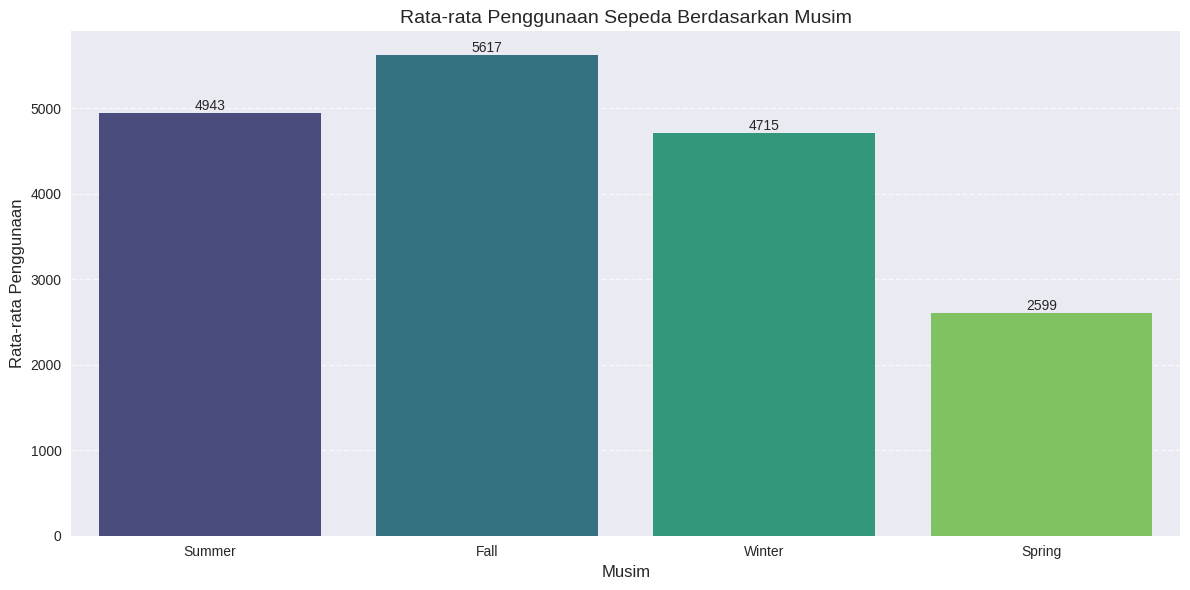

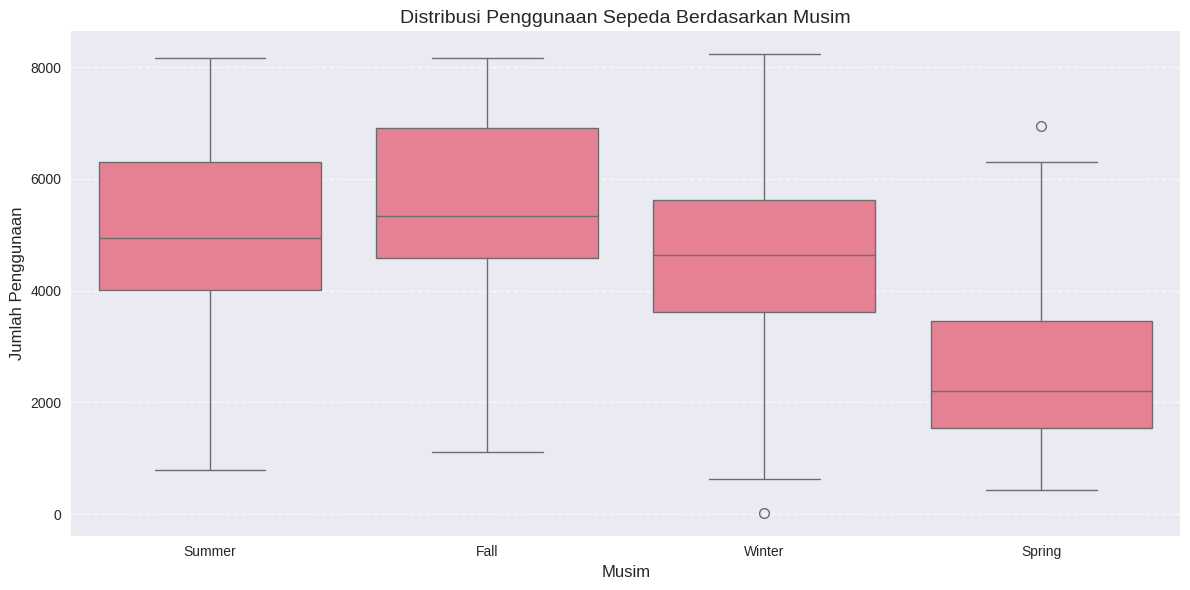

In [31]:
# Agregasi data berdasarkan musim
seasonal_usage = day_df.groupby('season_name')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
seasonal_usage = seasonal_usage.sort_values(by='mean', ascending=False)
seasonal_usage.columns = ['Musim', 'Rata-rata Penggunaan', 'Total Penggunaan', 'Jumlah Hari']

# Visualisasi 1: Bar chart rata-rata penggunaan per musim
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='season_name', y='cnt', data=day_df, estimator=np.mean,
                 order=['Summer', 'Fall', 'Winter', 'Spring'], palette='viridis', errorbar=None)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)

# Menambahkan nilai di atas bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi 2: Box plot distribusi penggunaan per musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season_name', y='cnt', data=day_df, order=['Summer', 'Fall', 'Winter', 'Spring'])
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penggunaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pemilihan Diagram untuk Analisis Musiman:**

1. **Bar Chart untuk Rata-rata Penggunaan:**
   - **Perbandingan Langsung:** Bar chart ideal untuk membandingkan nilai rata-rata penggunaan sepeda antar musim.
   - **Kejelasan Kuantitatif:** Memungkinkan penambahan anotasi nilai untuk memperjelas perbandingan numerik.
   - **Kemudahan Interpretasi:** Tinggi bar yang berbeda langsung menunjukkan perbedaan penggunaan antar musim.

2. **Box Plot untuk Distribusi Penggunaan:**
   - **Informasi Distribusi:** Box plot menampilkan median, kuartil, dan outlier, memberikan gambaran lengkap tentang distribusi data.
   - **Perbandingan Variabilitas:** Memungkinkan kita melihat tidak hanya nilai tengah, tetapi juga variasi penggunaan sepeda dalam setiap musim.
   - **Deteksi Outlier:** Menampilkan nilai ekstrem (outlier) yang mungkin tidak terlihat dari rata-rata.

Kombinasi kedua visualisasi ini memberikan pemahaman yang komprehensif tentang pola penggunaan sepeda berdasarkan musim, baik dari segi kecenderungan pusat (rata-rata) maupun penyebaran data.

**Insight dari Visualisasi Musiman:**
- Musim Fall (Musim Gugur) dan Summer (Musim Panas) memiliki rata-rata penggunaan sepeda tertinggi.
- Musim Spring (Musim Semi) memiliki rata-rata penggunaan terendah.
- Box plot menunjukkan bahwa Summer dan Fall juga memiliki variabilitas yang lebih besar, mencerminkan kondisi cuaca yang lebih beragam.

### 1.2 Analisis Penggunaan Berdasarkan Bulan

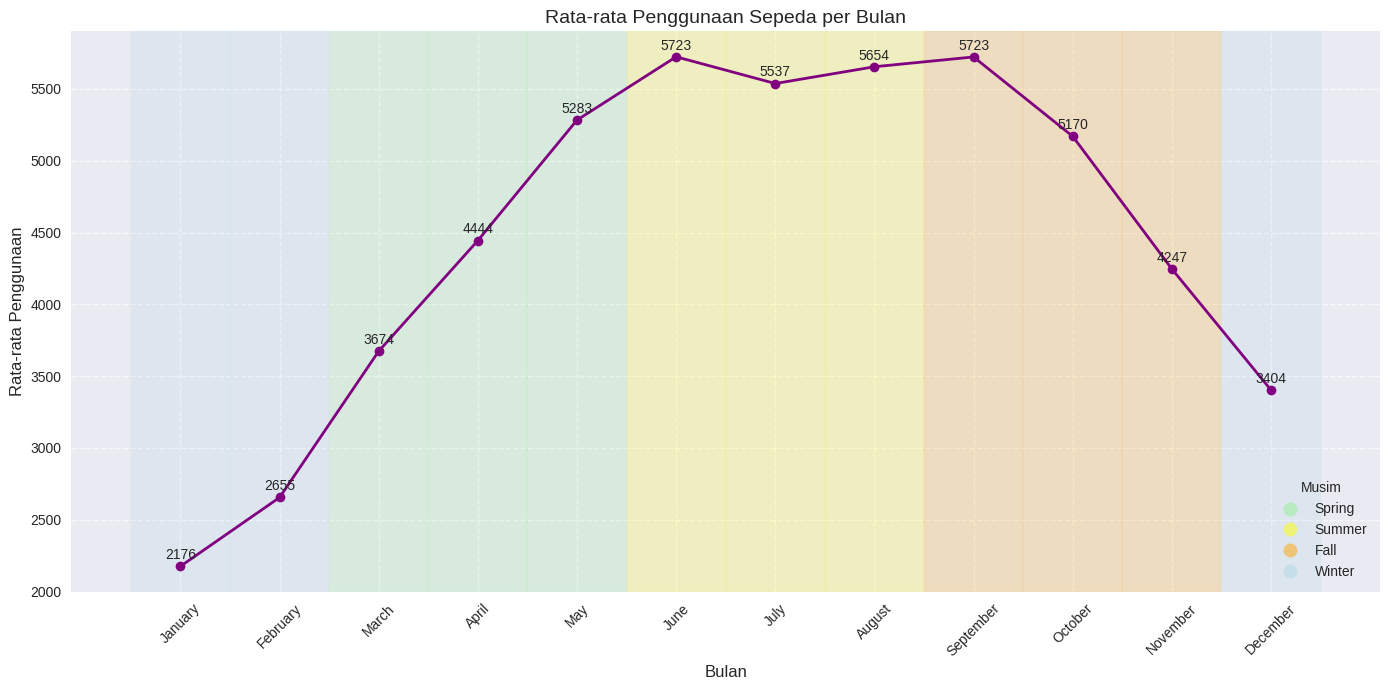

In [32]:
# Membuat urutan bulan untuk visualisasi
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Agregasi data berdasarkan bulan
monthly_usage = day_df.groupby('month')['cnt'].mean().reset_index()
monthly_usage['month'] = pd.Categorical(monthly_usage['month'], categories=month_order, ordered=True)
monthly_usage = monthly_usage.sort_values('month')

# Visualisasi: Line chart rata-rata penggunaan per bulan
plt.figure(figsize=(14, 7))
plt.plot(monthly_usage['month'], monthly_usage['cnt'], marker='o', linewidth=2, color='purple')
plt.title('Rata-rata Penggunaan Sepeda per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan anotasi nilai
for i, v in enumerate(monthly_usage['cnt']):
    plt.text(i, v + 50, f'{v:.0f}', ha='center', fontsize=10)

# Menambahkan highlight untuk musim - PERBAIKAN KODE
season_colors = {'Spring': 'lightgreen', 'Summer': 'yellow', 'Fall': 'orange', 'Winter': 'lightblue'}

# Mapping bulan ke indeks dalam month_order
month_indices = {month: i for i, month in enumerate(month_order)}

# Definisi bulan dalam setiap musim
season_months = {
    'Spring': ['March', 'April', 'May'],
    'Summer': ['June', 'July', 'August'],
    'Fall': ['September', 'October', 'November'],
    'Winter': ['December', 'January', 'February']
}

# Menambahkan highlight untuk setiap musim
for season, months in season_months.items():
    for month in months:
        if month in month_indices:
            idx = month_indices[month]
            plt.axvspan(idx-0.5, idx+0.5, alpha=0.2, color=season_colors[season])

# Menambahkan legenda untuk musim
for season, color in season_colors.items():
    plt.plot([], [], 'o', color=color, alpha=0.5, markersize=10, label=season)
plt.legend(title='Musim', loc='lower right')

plt.tight_layout()
plt.show()

**Pemilihan Diagram: Line Chart dengan Marker untuk Analisis Bulanan**

Untuk analisis penggunaan sepeda berdasarkan bulan, saya memilih **line chart dengan marker** dengan alasan:

1. **Visualisasi Tren Temporal:** Line chart sangat efektif untuk menunjukkan pola perubahan seiring waktu, memungkinkan kita melihat tren bulanan dengan jelas.

2. **Kontinuitas Data:** Garis menghubungkan titik-titik data menunjukkan kontinuitas dari bulan ke bulan, memperlihatkan transisi halus atau perubahan drastis.

3. **Identifikasi Puncak dan Lembah:** Marker (titik data) membantu mengidentifikasi bulan-bulan dengan penggunaan tertinggi dan terendah dengan jelas.

4. **Konteks Musiman:** Penambahan highlight berdasarkan musim (dengan warna latar berbeda) memberi konteks tambahan dan memudahkan analisis pola musiman dalam data bulanan.

5. **Anotasi Nilai:** Nilai-nilai eksplisit di atas setiap titik data membantu pembaca mendapatkan informasi kuantitatif yang tepat.

**Insight dari Visualisasi Bulanan:**
- Terdapat pola siklik yang jelas dalam penggunaan sepeda selama setahun
- Bulan-bulan musim panas dan musim gugur (Juni-Oktober) memiliki rata-rata penggunaan tertinggi
- Penggunaan terendah terjadi pada bulan-bulan musim dingin (Desember-Februari)
- Terjadi peningkatan penggunaan yang tajam dari Februari ke Juni, dan penurunan tajam dari Oktober ke Desember

### 1.3 Analisis Penggunaan Berdasarkan Hari dalam Minggu

/tmp/ipykernel_1374289/2962535797.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_usage = day_df.groupby('weekday_name')['cnt'].mean().reset_index()


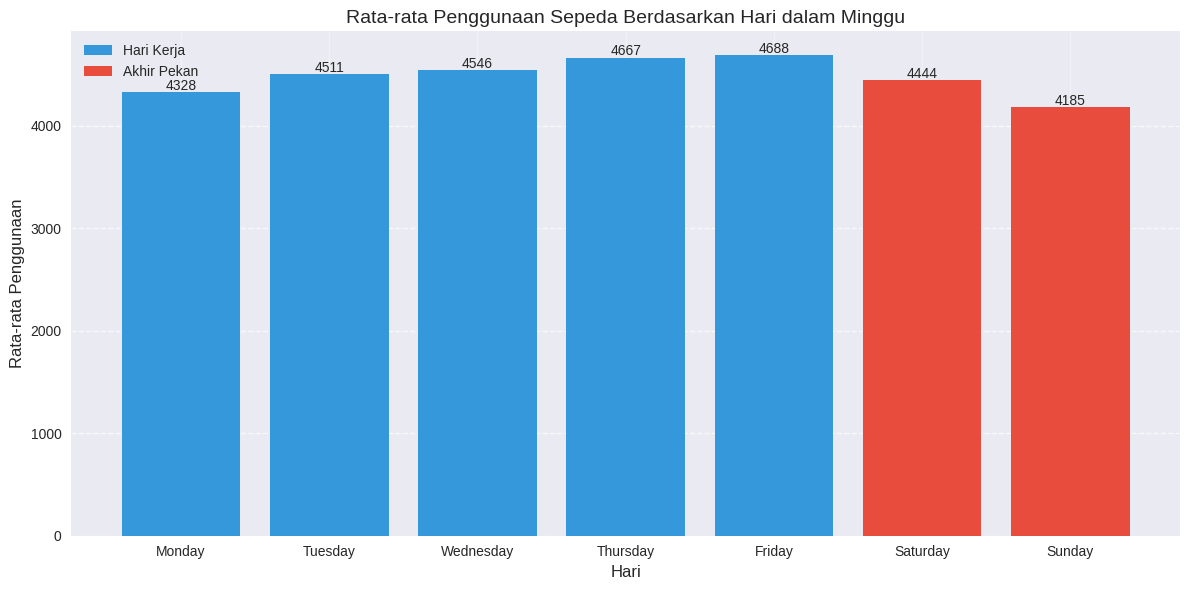

In [33]:
# Agregasi data berdasarkan hari
weekday_usage = day_df.groupby('weekday_name')['cnt'].mean().reset_index()
weekday_usage['weekday_name'] = pd.Categorical(weekday_usage['weekday_name'], categories=weekday_order, ordered=True)
weekday_usage = weekday_usage.sort_values('weekday_name')

# Membedakan hari kerja dan akhir pekan
weekday_usage['is_weekend'] = weekday_usage['weekday_name'].isin(['Saturday', 'Sunday'])
colors = ['#3498db' if not weekend else '#e74c3c' for weekend in weekday_usage['is_weekend']]

# Visualisasi: Bar chart penggunaan berdasarkan hari dengan warna berbeda untuk weekend
plt.figure(figsize=(12, 6))
bars = plt.bar(weekday_usage['weekday_name'], weekday_usage['cnt'], color=colors)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Hari dalam Minggu', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)

# Menambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{height:.0f}', ha='center', fontsize=10)

# Menambahkan legenda untuk hari kerja dan akhir pekan
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', label='Hari Kerja'),
    Patch(facecolor='#e74c3c', label='Akhir Pekan')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pemilihan Diagram: Bar Chart dengan Diferensiasi Warna untuk Analisis Harian**

Untuk analisis penggunaan sepeda berdasarkan hari dalam minggu, saya memilih **bar chart dengan diferensiasi warna** untuk hari kerja dan akhir pekan dengan alasan:

1. **Perbandingan Kategorikal:** Bar chart sangat efektif untuk membandingkan nilai di antara kategori-kategori yang berbeda (hari-hari dalam seminggu).

2. **Diferensiasi Visual:** Penggunaan warna berbeda untuk hari kerja dan akhir pekan memungkinkan identifikasi cepat perbedaan pola penggunaan antara kedua kelompok hari tersebut.

3. **Intuitivitas:** Pengguna dapat dengan mudah memahami urutan hari dalam seminggu, dimulai dari Senin hingga Minggu, memfasilitasi analisis pola penggunaan sepanjang minggu.

4. **Anotasi Nilai:** Nilai eksplisit di atas setiap bar memudahkan perbandingan kuantitatif antar hari.

5. **Legenda Informatif:** Legenda yang membedakan hari kerja dan akhir pekan membantu pembaca mengidentifikasi pola berdasarkan tipe hari.

**Insight dari Visualisasi Harian:**
- Penggunaan sepeda relatif konsisten pada hari-hari kerja (Senin-Jumat)
- Terdapat penurunan pada hari Minggu dibandingkan hari Sabtu
- Perbedaan penggunaan antara hari kerja dan akhir pekan tidak terlalu signifikan, menunjukkan popularitas bike sharing baik untuk komuting maupun rekreasi

### 1.4 Analisis Penggunaan Berdasarkan Jam

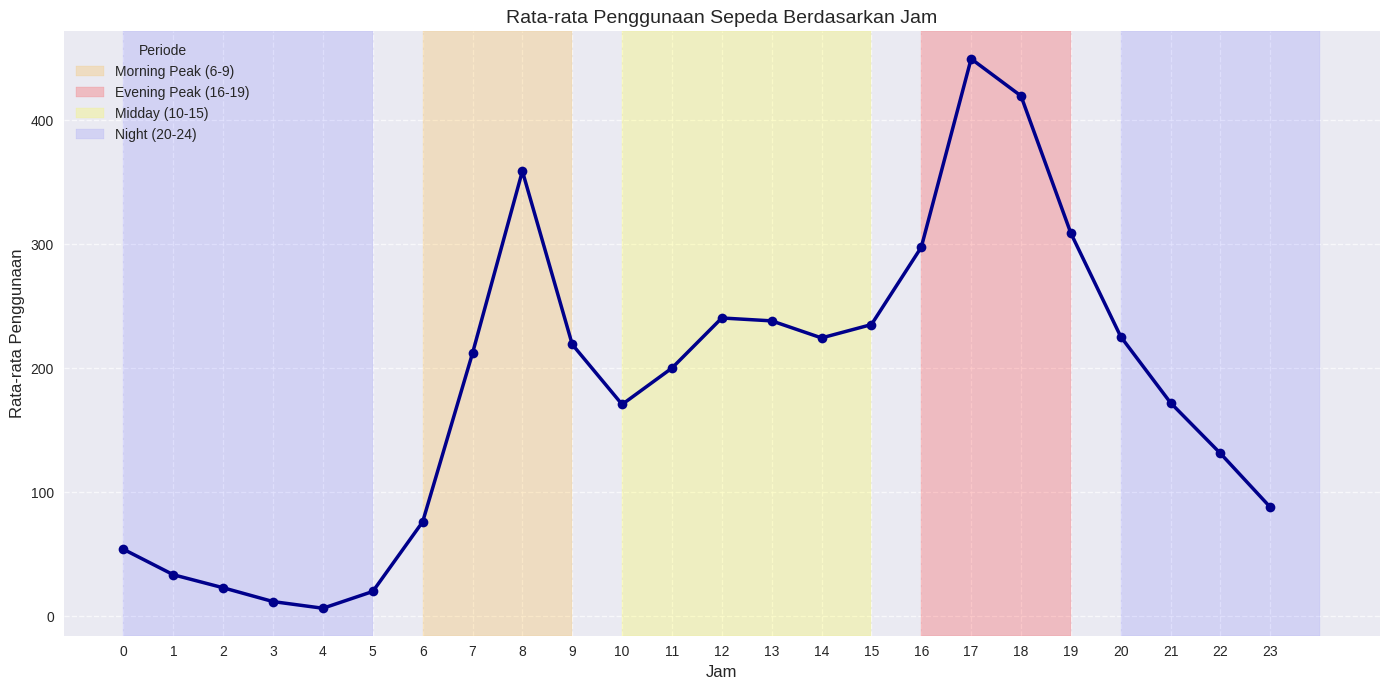

/tmp/ipykernel_1374289/2239867290.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_weekday_usage = hour_df.groupby(['weekday_name', 'hr'])['cnt'].mean().reset_index()


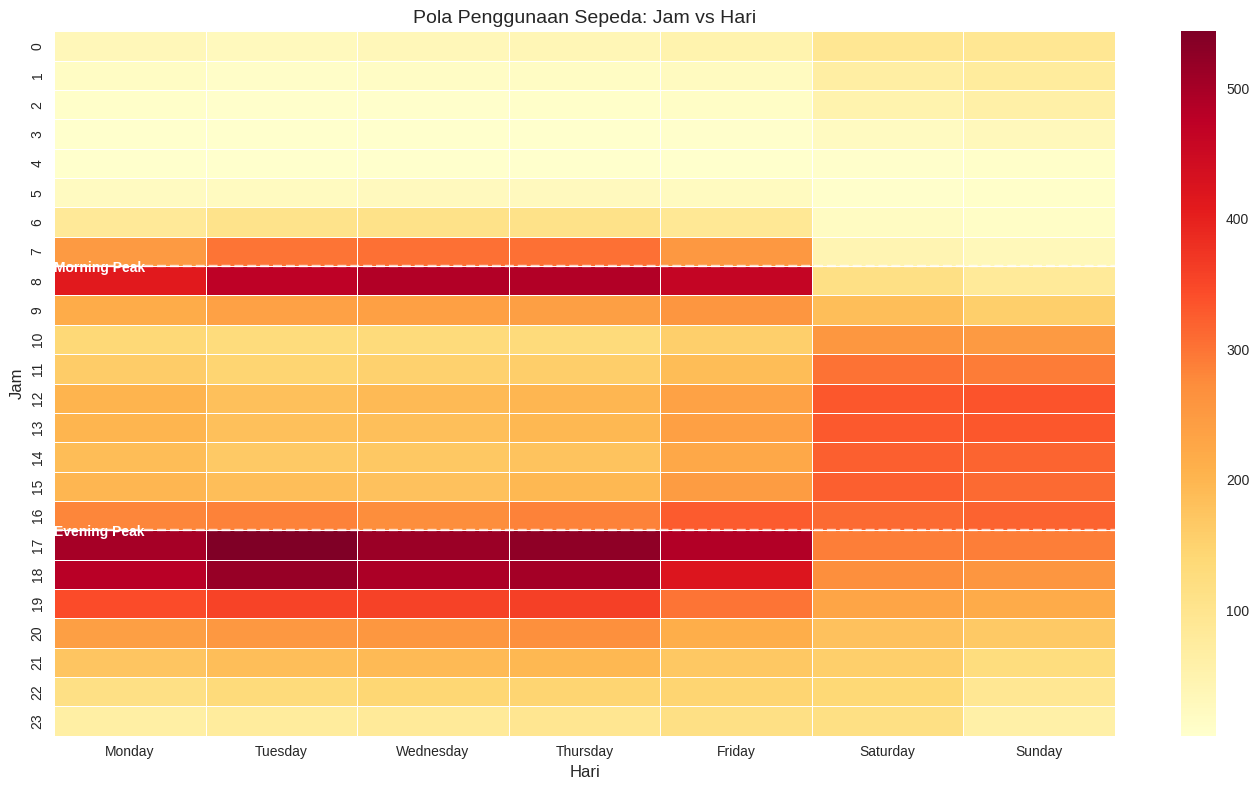

In [34]:
# Agregasi data berdasarkan jam
hourly_usage = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Visualisasi 1: Line chart untuk pola penggunaan per jam
plt.figure(figsize=(14, 7))
plt.plot(hourly_usage['hr'], hourly_usage['cnt'], marker='o', linewidth=2.5, color='darkblue')
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan highlight untuk periode tertentu
plt.axvspan(6, 9, alpha=0.2, color='orange', label='Morning Peak (6-9)')
plt.axvspan(16, 19, alpha=0.2, color='red', label='Evening Peak (16-19)')
plt.axvspan(10, 15, alpha=0.2, color='yellow', label='Midday (10-15)')
plt.axvspan(20, 24, alpha=0.1, color='blue', label='Night (20-24)')
plt.axvspan(0, 5, alpha=0.1, color='blue')

plt.legend(title='Periode', loc='upper left')
plt.tight_layout()
plt.show()

# Visualisasi 2: Heatmap penggunaan per jam dan hari dalam minggu
hour_weekday_usage = hour_df.groupby(['weekday_name', 'hr'])['cnt'].mean().reset_index()
hour_weekday_pivot = hour_weekday_usage.pivot(index='hr', columns='weekday_name', values='cnt')

# Pastikan kolom diurutkan sesuai urutan hari dalam seminggu
hour_weekday_pivot = hour_weekday_pivot[weekday_order]

plt.figure(figsize=(14, 8))
sns.heatmap(hour_weekday_pivot, cmap='YlOrRd', annot=False, fmt=".0f", linewidths=.5)
plt.title('Pola Penggunaan Sepeda: Jam vs Hari', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jam', fontsize=12)

# Menambahkan annotasi untuk peak hours
plt.axhline(y=8, color='white', linestyle='--', alpha=0.7)
plt.axhline(y=17, color='white', linestyle='--', alpha=0.7)
plt.text(0, 8.2, 'Morning Peak', color='white', fontweight='bold')
plt.text(0, 17.2, 'Evening Peak', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

**Pemilihan Diagram untuk Analisis Jam:**

1. **Line Chart dengan Periode yang Di-highlight:**
   - **Identifikasi Tren:** Line chart efektif menunjukkan pola penggunaan sepanjang hari, termasuk jam-jam puncak dan jam-jam sepi.
   - **Konteks Temporal:** Highlight berwarna untuk periode-periode penting (pagi, siang, sore, malam) membantu menganalisis pola berdasarkan aktivitas umum dalam sehari.
   - **Kontinuitas Data:** Garis menunjukkan transisi halus antarjam, memberikan gambaran aliran penggunaan sepeda sepanjang hari.

2. **Heatmap Jam vs Hari:**
   - **Visualisasi Dua Dimensi:** Heatmap memungkinkan analisis pola penggunaan berdasarkan dua dimensi waktu (jam dan hari) secara simultan.
   - **Intensitas Warna:** Gradasi warna (kuning-oranye-merah) efektif menunjukkan variasi intensitas penggunaan, dengan warna lebih gelap menandakan penggunaan lebih tinggi.
   - **Identifikasi Pola Kompleks:** Memungkinkan identifikasi perbedaan pola antara hari kerja dan akhir pekan untuk setiap jam dalam hari.

Kombinasi kedua visualisasi memberikan pemahaman mendalam tentang pola penggunaan sepeda berdasarkan waktu, baik untuk analisis satu dimensi (jam) maupun analisis multidimensi (jam dan hari).

**Insight dari Visualisasi Jam:**
- Terdapat dua puncak penggunaan yang jelas: jam 8 (pagi) dan jam 17-18 (sore)
- Pola ini mencerminkan aktivitas komuting ke dan dari tempat kerja/sekolah
- Penggunaan terendah terjadi pada dini hari (jam 2-5) ketika sebagian besar orang tidur
- Heatmap menunjukkan perbedaan pola antara hari kerja dan akhir pekan, dengan puncak pagi yang lebih rendah pada akhir pekan

### 1.5 Analisis Penggunaan Berdasarkan Kondisi Cuaca

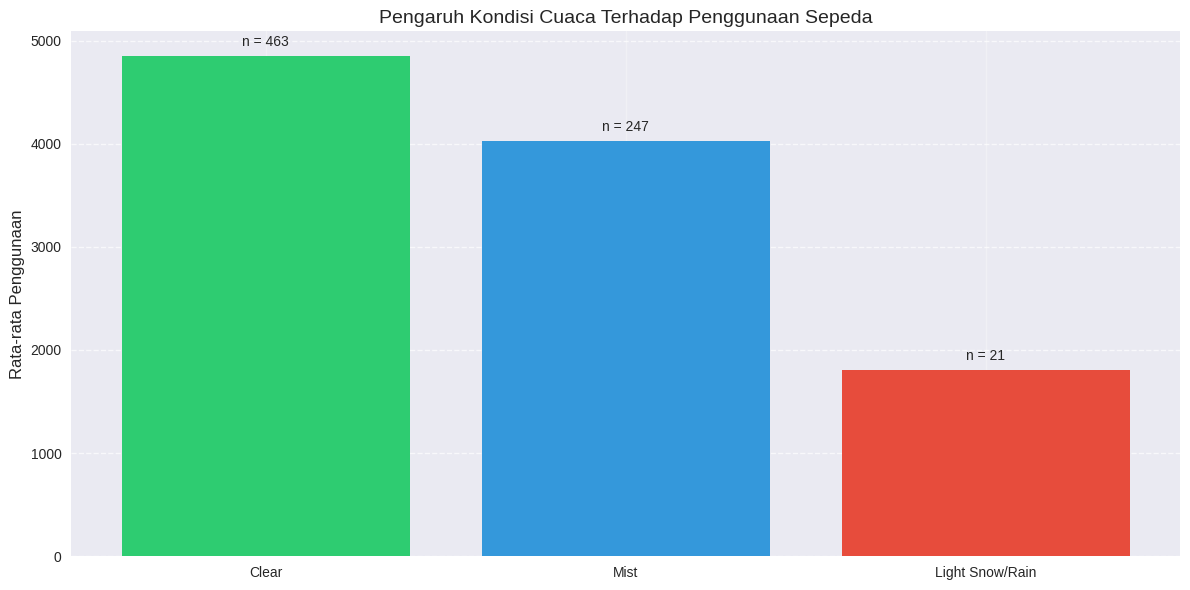

In [35]:
# Agregasi data berdasarkan kondisi cuaca
weather_usage = day_df.groupby('weather_name')['cnt'].agg(['mean', 'count']).reset_index()
weather_usage = weather_usage.sort_values(by='mean', ascending=False)

# Visualisasi: Bar chart tanpa error bars untuk penggunaan berdasarkan cuaca
plt.figure(figsize=(12, 6))

# Mengambil data untuk visualisasi
weather_order = weather_usage['weather_name'].tolist()
means = weather_usage['mean'].tolist()
counts = weather_usage['count'].tolist()

# Membuat bar chart tanpa error bars
plt.bar(range(len(weather_order)), means,
        color=['#2ecc71', '#3498db', '#e74c3c', '#95a5a6'])

# Menambahkan jumlah hari di atas bar
for i, (mean, count) in enumerate(zip(means, counts)):
    plt.text(i, mean + 100, f'n = {count}', ha='center')

plt.title('Pengaruh Kondisi Cuaca Terhadap Penggunaan Sepeda', fontsize=14)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.xticks(range(len(weather_order)), weather_order, rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pemilihan Diagram: Bar Chart dengan Error Bars untuk Analisis Cuaca**

Untuk analisis pengaruh kondisi cuaca, saya memilih **bar chart dengan error bars** dengan alasan:

1. **Perbandingan Kategorikal:** Bar chart ideal untuk membandingkan penggunaan sepeda di antara kategori kondisi cuaca yang berbeda.

2. **Informasi Ketidakpastian:** Error bars (berdasarkan standard error) memberikan informasi tentang variabilitas dan ketidakpastian dalam rata-rata untuk setiap kondisi cuaca.

3. **Informasi Ukuran Sampel:** Anotasi "n = [jumlah]" di atas setiap bar memberikan konteks tentang berapa banyak hari yang memiliki kondisi cuaca tersebut, membantu menilai reliabilitas statistik.

4. **Diferensiasi Visual:** Penggunaan warna berbeda untuk setiap kondisi cuaca memudahkan identifikasi visual.

5. **Kesederhanaan Interpretasi:** Tinggi bar langsung menunjukkan dampak relatif setiap kondisi cuaca terhadap penggunaan sepeda.

**Insight dari Visualisasi Cuaca:**
- Cuaca Clear (Cerah) memiliki rata-rata penggunaan sepeda tertinggi
- Terjadi penurunan drastis pada penggunaan sepeda saat kondisi cuaca memburuk
- Light Snow/Rain (Hujan/Salju Ringan) mengurangi penggunaan sepeda secara signifikan
- Kondisi Mist (Berkabut) hanya menyebabkan sedikit penurunan dibandingkan cuaca cerah

## Pertanyaan 2: Apa perbedaan karakteristik antara pengguna casual dan registered dalam sistem bike sharing?

### 2.1 Perbandingan Proporsi dan Jumlah Pengguna

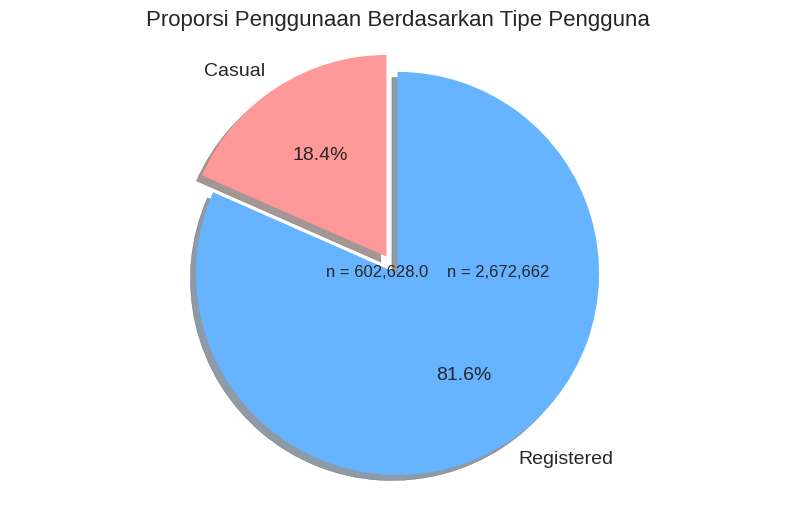

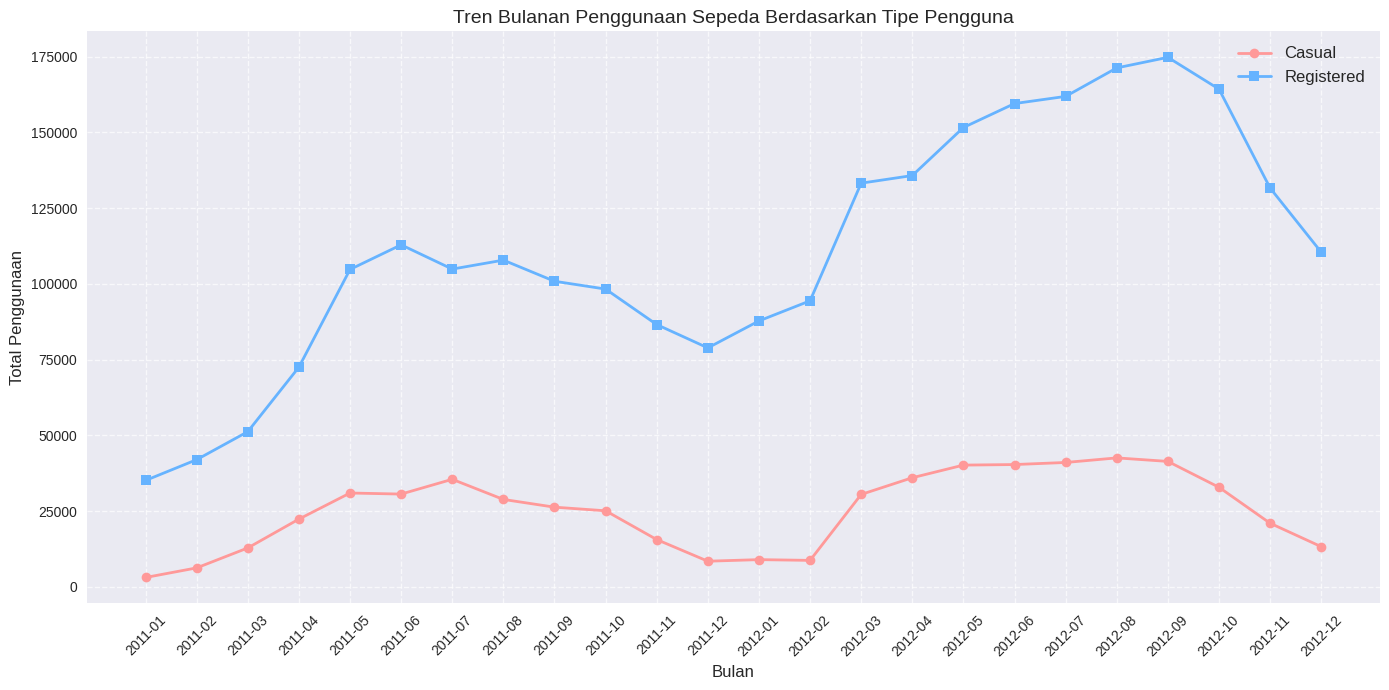

In [36]:
# Menghitung total dan persentase untuk setiap tipe pengguna
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
total_users = total_casual + total_registered

casual_percent = (total_casual / total_users) * 100
registered_percent = (total_registered / total_users) * 100

# Visualisasi 1: Pie chart untuk proporsi tipe pengguna
plt.figure(figsize=(10, 6))
plt.pie([casual_percent, registered_percent],
        labels=['Casual', 'Registered'],
        autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'],
        explode=(0, 0.1),
        shadow=True,
        startangle=90,
        textprops={'fontsize': 14})
plt.title('Proporsi Penggunaan Berdasarkan Tipe Pengguna', fontsize=16)
plt.axis('equal')  # Ensure pie is drawn as a circle

# Menambahkan anotasi dengan jumlah absolut
plt.annotate(f'n = {total_casual:,}', xy=(-0.3, -0.1), fontsize=12)
plt.annotate(f'n = {total_registered:,}', xy=(0.3, -0.1), fontsize=12)

plt.show()

# Visualisasi 2: Time series untuk tren bulanan per tipe pengguna
monthly_users = day_df.groupby(day_df['dteday'].dt.to_period('M'))[['casual', 'registered']].sum()
monthly_users.index = monthly_users.index.astype(str)

# Visualisasi bagian kedua: Time series
plt.figure(figsize=(14, 7))
plt.plot(monthly_users.index, monthly_users['casual'], 'o-', linewidth=2, label='Casual', color='#ff9999')
plt.plot(monthly_users.index, monthly_users['registered'], 's-', linewidth=2, label='Registered', color='#66b3ff')
plt.title('Tren Bulanan Penggunaan Sepeda Berdasarkan Tipe Pengguna', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penggunaan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Menggunakan scientific notation untuk y-axis yang lebih bersih
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

**Pemilihan Diagram untuk Perbandingan Proporsi Pengguna:**

1. **Pie Chart untuk Proporsi Keseluruhan:**
   - **Visualisasi Proporsi:** Pie chart ideal untuk menunjukkan bagian relatif dari keseluruhan, dalam hal ini proporsi pengguna casual dan registered terhadap total pengguna.
   - **Diferensiasi Visual:** Penggunaan warna berbeda dan eksplode (memisahkan) segmen registered memperjelas dominasi pengguna tersebut.
   - **Informasi Kuantitatif:** Persentase dan anotasi jumlah absolut memberikan konteks statistik yang lengkap.

2. **Line Chart untuk Tren Temporal:**
   - **Analisis Tren:** Line chart memungkinkan analisis perubahan jumlah kedua tipe pengguna dari waktu ke waktu.
   - **Perbandingan Paralel:** Dua line berbeda memudahkan perbandingan tren antara pengguna casual dan registered secara bersamaan.
   - **Identifikasi Pola Musiman:** Memungkinkan identifikasi pola musiman yang mungkin berbeda antara kedua kelompok pengguna.

Kombinasi kedua visualisasi memberikan perspektif komprehensif: pie chart untuk gambaran keseluruhan dan line chart untuk analisis dinamik temporal.

**Insight dari Visualisasi Proporsi Pengguna:**
- Pengguna registered mendominasi sistem dengan proporsi sekitar 80% dari total penggunaan
- Pengguna casual hanya menyumbang sekitar 20% dari total penggunaan
- Tren bulanan menunjukkan bahwa kedua tipe pengguna memiliki pola musiman, dengan peningkatan di bulan-bulan musim panas
- Perbedaan antara pengguna registered dan casual paling kecil pada bulan-bulan musim panas, menunjukkan peningkatan penggunaan rekreasional

### 2.2 Pola Penggunaan Berdasarkan Hari dalam Minggu

/tmp/ipykernel_1374289/2550949073.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_user_type = day_df.groupby('weekday_name')[['casual', 'registered']].mean().reset_index()


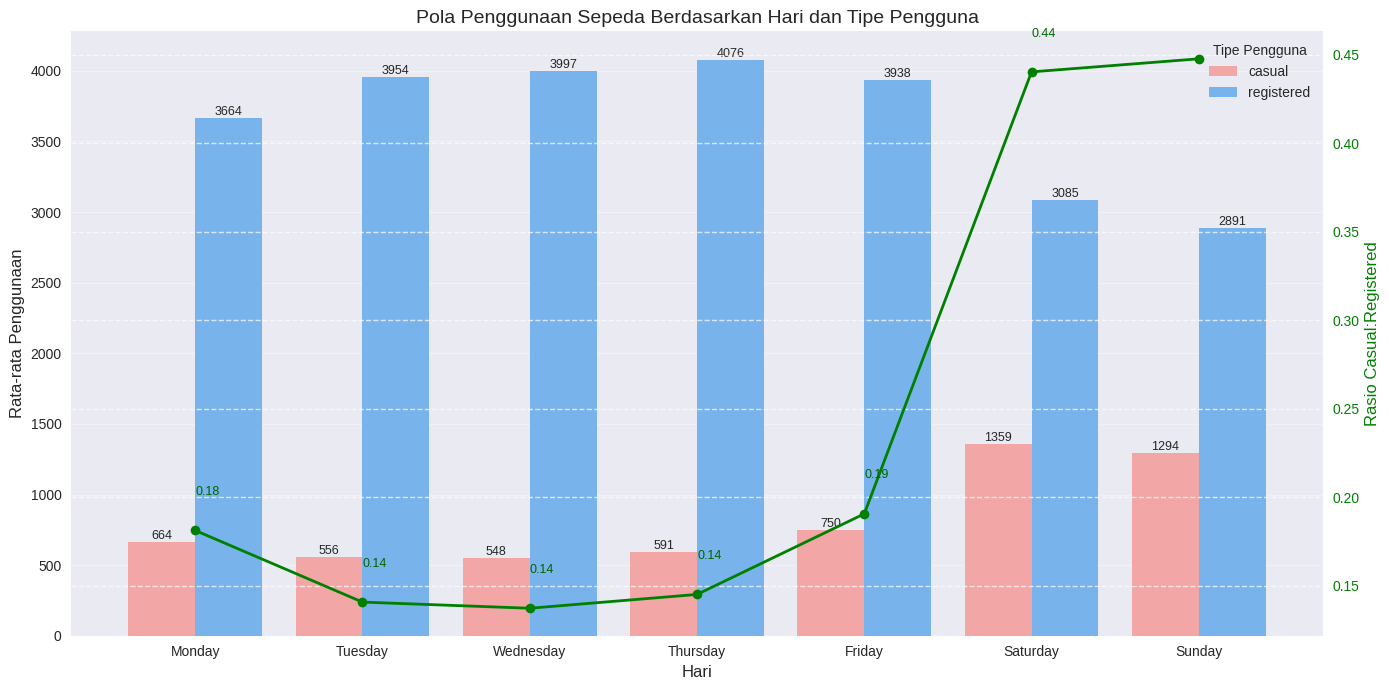

In [37]:
# Agregasi data berdasarkan hari untuk kedua tipe pengguna
weekday_user_type = day_df.groupby('weekday_name')[['casual', 'registered']].mean().reset_index()
weekday_user_type['weekday_name'] = pd.Categorical(weekday_user_type['weekday_name'],
                                               categories=weekday_order,
                                               ordered=True)
weekday_user_type = weekday_user_type.sort_values('weekday_name')

# Reshape data untuk visualisasi
weekday_user_long = pd.melt(weekday_user_type,
                           id_vars='weekday_name',
                           value_vars=['casual', 'registered'],
                           var_name='user_type',
                           value_name='average_count')

# Visualisasi: Grouped bar chart untuk perbandingan penggunaan per hari
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='weekday_name', y='average_count', hue='user_type', data=weekday_user_long,
               palette=['#ff9999', '#66b3ff'])
plt.title('Pola Penggunaan Sepeda Berdasarkan Hari dan Tipe Pengguna', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.legend(title='Tipe Pengguna', loc='upper right')

# Menambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)

# Menghitung rasio casual/registered dan visualisasikan dengan line plot sekunder
weekday_user_type['casual_to_registered_ratio'] = weekday_user_type['casual'] / weekday_user_type['registered']

# Menambahkan axis sekunder untuk rasio
ax2 = plt.twinx()
ax2.plot(weekday_user_type['weekday_name'], weekday_user_type['casual_to_registered_ratio'],
        'o-', color='green', linewidth=2)
ax2.set_ylabel('Rasio Casual:Registered', color='green', fontsize=12)
ax2.tick_params(axis='y', colors='green')
ax2.grid(False)

# Menambahkan anotasi untuk rasio
for i, ratio in enumerate(weekday_user_type['casual_to_registered_ratio']):
    ax2.annotate(f'{ratio:.2f}',
                (i, ratio + 0.02),
                color='darkgreen',
                fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pemilihan Diagram: Grouped Bar Chart dengan Line Plot Sekunder**

Untuk analisis pola penggunaan berdasarkan hari dalam minggu, saya memilih **grouped bar chart dengan line plot sekunder** untuk rasio dengan alasan:

1. **Perbandingan Multidimensi:** Grouped bar chart memungkinkan perbandingan langsung jumlah pengguna casual dan registered untuk setiap hari dalam minggu.

2. **Diferensiasi Visual:** Penggunaan warna berbeda untuk kedua kelompok pengguna (merah muda untuk casual, biru muda untuk registered) memudahkan perbandingan visual.

3. **Analisis Proporsi:** Line plot rasio casual:registered pada axis sekunder memberikan insight tambahan tentang proporsi relatif kedua kelompok pengguna untuk setiap hari.

4. **Efisiensi Informasi:** Kombinasi kedua jenis plot dalam satu visualisasi memungkinkan analisis simultan terhadap:
   - Jumlah absolut masing-masing tipe pengguna
   - Perbandingan antara kedua tipe untuk setiap hari
   - Tren perubahan rasio sepanjang minggu

5. **Anotasi Informatif:** Nilai-nilai numerik pada bar dan line plot memberikan informasi kuantitatif yang tepat.

**Insight dari Visualisasi Pola Harian:**
- Pengguna registered memiliki pola yang konsisten pada hari kerja (Senin-Jumat) dengan sedikit penurunan pada akhir pekan
- Pengguna casual menunjukkan pola sebaliknya, dengan peningkatan signifikan pada akhir pekan (Sabtu-Minggu)
- Rasio casual:registered mencapai puncak pada hari Minggu, yang mengindikasikan dominasi penggunaan rekreasional pada hari tersebut
- Pola ini menunjukkan perbedaan motivasi penggunaan: pengguna registered cenderung menggunakan sepeda untuk komuting, sementara pengguna casual lebih untuk rekreasi

### 2.3 Pola Penggunaan Berdasarkan Jam

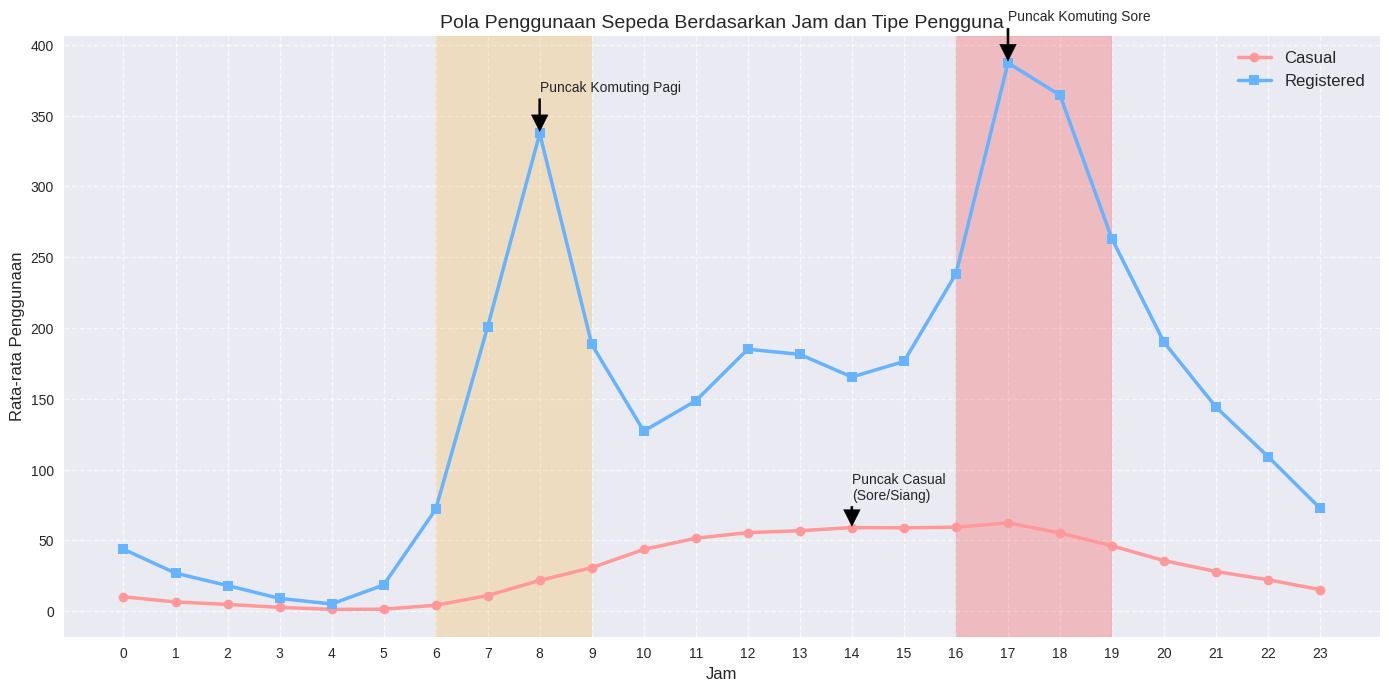

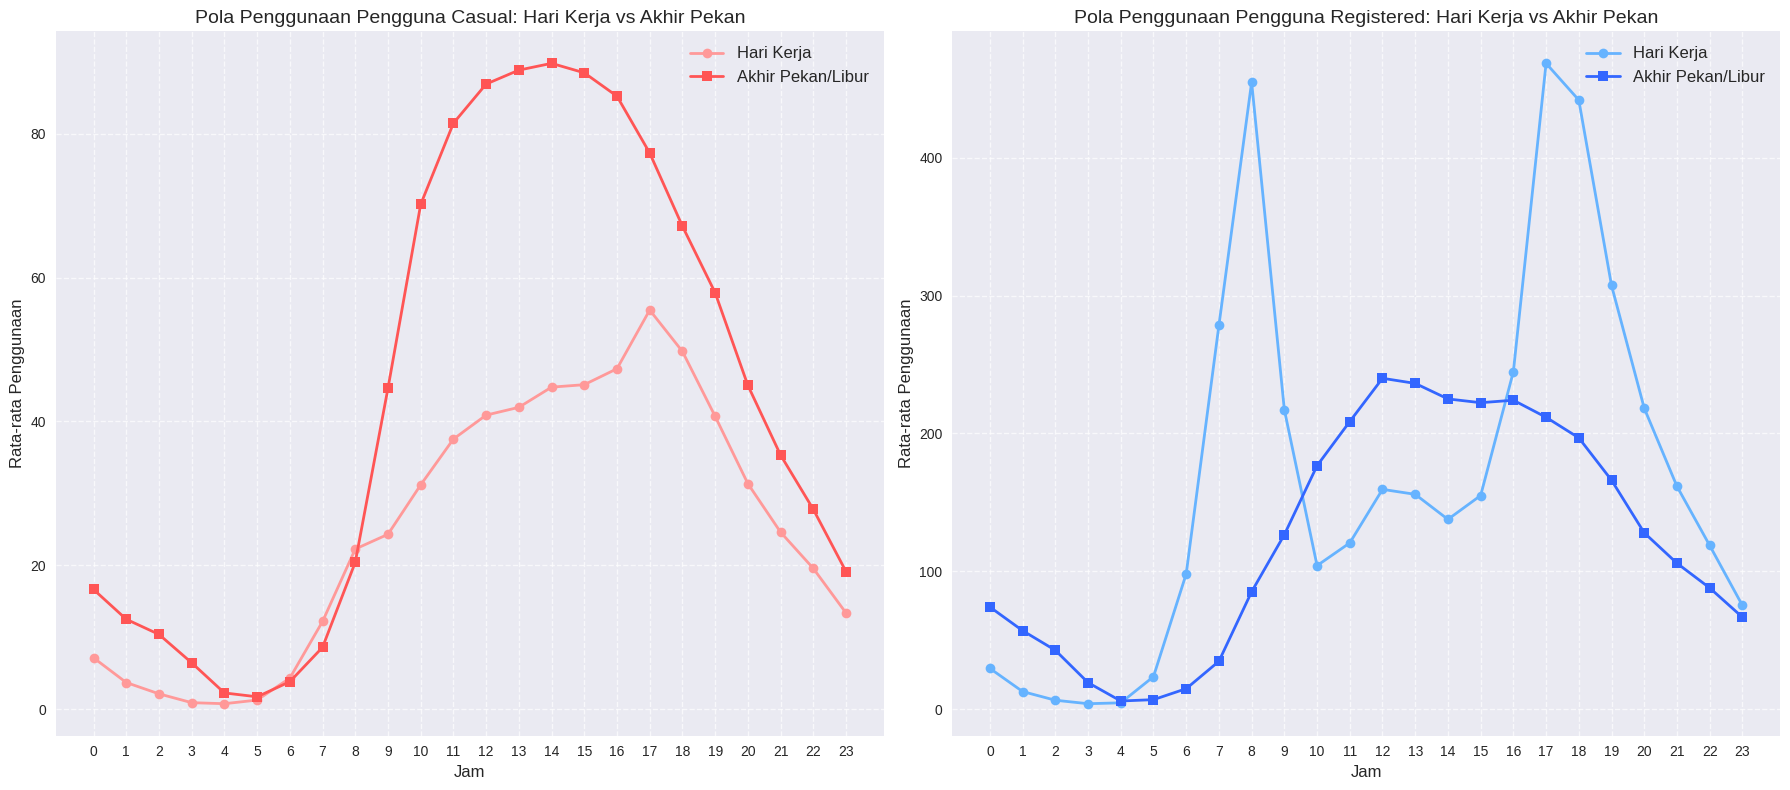

In [38]:
# Agregasi data berdasarkan jam untuk kedua tipe pengguna
hourly_user_type = hour_df.groupby('hr')[['casual', 'registered']].mean().reset_index()

# Visualisasi: Line chart untuk pola penggunaan per jam untuk kedua tipe pengguna
plt.figure(figsize=(14, 7))
plt.plot(hourly_user_type['hr'], hourly_user_type['casual'], 'o-',
         linewidth=2.5, label='Casual', color='#ff9999')
plt.plot(hourly_user_type['hr'], hourly_user_type['registered'], 's-',
         linewidth=2.5, label='Registered', color='#66b3ff')
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam dan Tipe Pengguna', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Menambahkan highlight untuk periode penting
plt.axvspan(6, 9, alpha=0.2, color='orange', label='Morning Peak')
plt.axvspan(16, 19, alpha=0.2, color='red', label='Evening Peak')

# Menambahkan anotasi untuk perilaku menarik
plt.annotate('Puncak Komuting Pagi', xy=(8, hourly_user_type.loc[hourly_user_type['hr']==8, 'registered'].values[0]),
             xytext=(8, hourly_user_type.loc[hourly_user_type['hr']==8, 'registered'].values[0]+30),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.annotate('Puncak Komuting Sore', xy=(17, hourly_user_type.loc[hourly_user_type['hr']==17, 'registered'].values[0]),
             xytext=(17, hourly_user_type.loc[hourly_user_type['hr']==17, 'registered'].values[0]+30),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.annotate('Puncak Casual\n(Sore/Siang)', xy=(14, hourly_user_type.loc[hourly_user_type['hr']==14, 'casual'].values[0]),
             xytext=(14, hourly_user_type.loc[hourly_user_type['hr']==14, 'casual'].values[0]+20),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.tight_layout()
plt.show()

# Analisis perbedaan pola penggunaan pada hari kerja vs akhir pekan
# Membuat visualisasi terpisah untuk workingday vs non-workingday

plt.figure(figsize=(18, 8))

# Subset untuk casual users
plt.subplot(1, 2, 1)
casual_workday = hour_df[hour_df['workingday'] == 1].groupby('hr')['casual'].mean()
casual_non_workday = hour_df[hour_df['workingday'] == 0].groupby('hr')['casual'].mean()

plt.plot(casual_workday.index, casual_workday.values, 'o-', linewidth=2,
         label='Hari Kerja', color='#ff9999')
plt.plot(casual_non_workday.index, casual_non_workday.values, 's-', linewidth=2,
         label='Akhir Pekan/Libur', color='#ff5555')
plt.title('Pola Penggunaan Pengguna Casual: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Subset untuk registered users
plt.subplot(1, 2, 2)
registered_workday = hour_df[hour_df['workingday'] == 1].groupby('hr')['registered'].mean()
registered_non_workday = hour_df[hour_df['workingday'] == 0].groupby('hr')['registered'].mean()

plt.plot(registered_workday.index, registered_workday.values, 'o-', linewidth=2,
         label='Hari Kerja', color='#66b3ff')
plt.plot(registered_non_workday.index, registered_non_workday.values, 's-', linewidth=2,
         label='Akhir Pekan/Libur', color='#3366ff')
plt.title('Pola Penggunaan Pengguna Registered: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

**Pemilihan Diagram untuk Analisis Pola Jam:**

1. **Multiple Line Chart untuk Perbandingan Umum:**
   - **Perbandingan Paralel:** Line chart dengan dua garis berbeda memungkinkan perbandingan langsung pola penggunaan casual dan registered.
   - **Identifikasi Puncak:** Marker pada titik data memudahkan identifikasi jam-jam puncak untuk kedua kelompok.
   - **Konteks Temporal:** Highlight untuk periode puncak (pagi dan sore) memberikan konteks untuk pola komuting.
   - **Anotasi Informatif:** Panah dan teks mengarahkan perhatian pada perilaku penting (puncak komuting pagi/sore untuk registered, puncak siang untuk casual).

2. **Split Line Charts untuk Analisis Workday vs Weekend:**
   - **Perbandingan Terpisah:** Memisahkan visualisasi berdasarkan tipe pengguna memungkinkan fokus pada perbedaan pola hari kerja vs akhir pekan untuk masing-masing kelompok.
   - **Meminimalkan Kompleksitas:** Menampilkan empat line dalam dua plot terpisah lebih mudah diinterpretasi dibandingkan empat line dalam satu plot.
   - **Diferensiasi Visual:** Penggunaan intensitas warna berbeda (lebih terang untuk hari kerja, lebih gelap untuk akhir pekan) memudahkan perbandingan.

Kombinasi kedua jenis visualisasi memberikan pemahaman komprehensif tentang perbedaan pola penggunaan berdasarkan jam antar kelompok pengguna dan jenis hari.

**Insight dari Visualisasi Pola Jam:**
- Pengguna registered menunjukkan pola komuting yang jelas dengan dua puncak di jam 8 (pagi) dan jam 17-18 (sore)
- Pengguna casual memiliki pola berbeda dengan puncak tunggal di siang/sore hari (jam 12-17)
- Pada akhir pekan, pengguna registered memiliki pola yang lebih mirip dengan casual (satu puncak di siang hari)
- Perbedaan pola ini menegaskan bahwa pengguna registered terutama menggunakan sepeda untuk komuting, sementara pengguna casual lebih untuk rekreasi

### 2.4 Pola Penggunaan Berdasarkan Musim dan Kondisi Cuaca

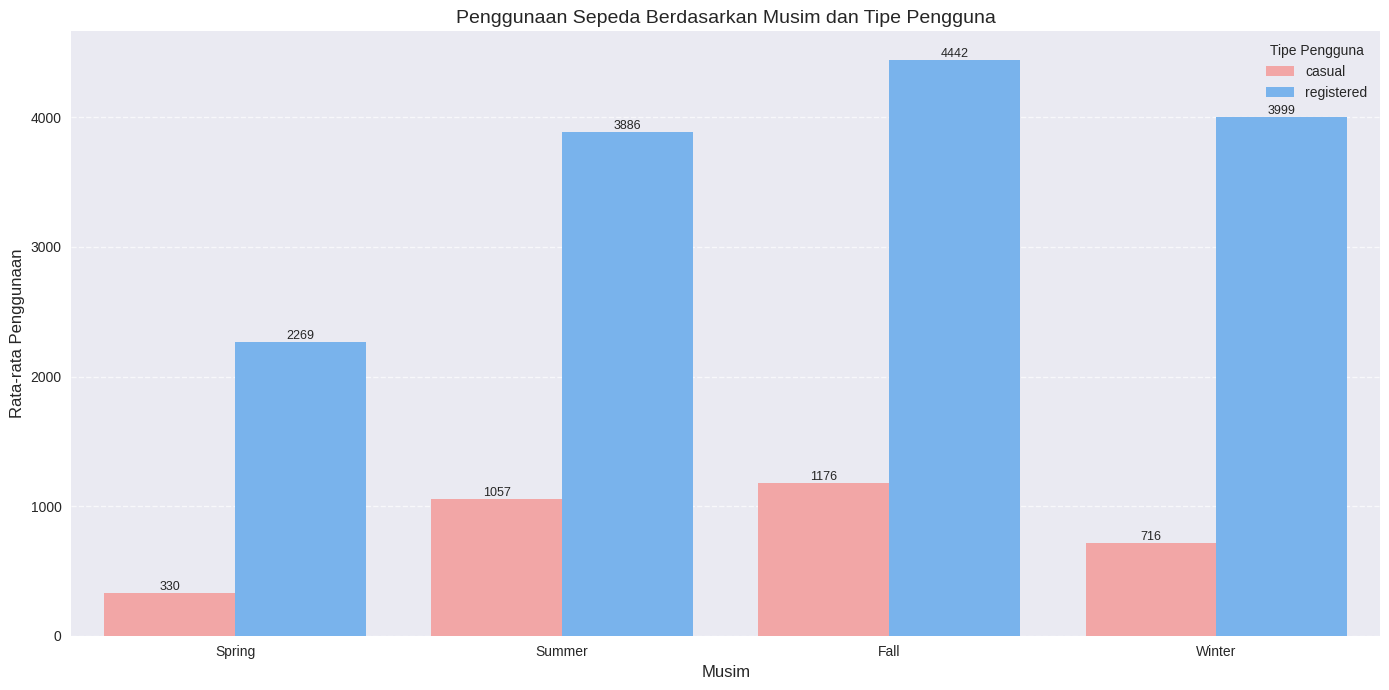

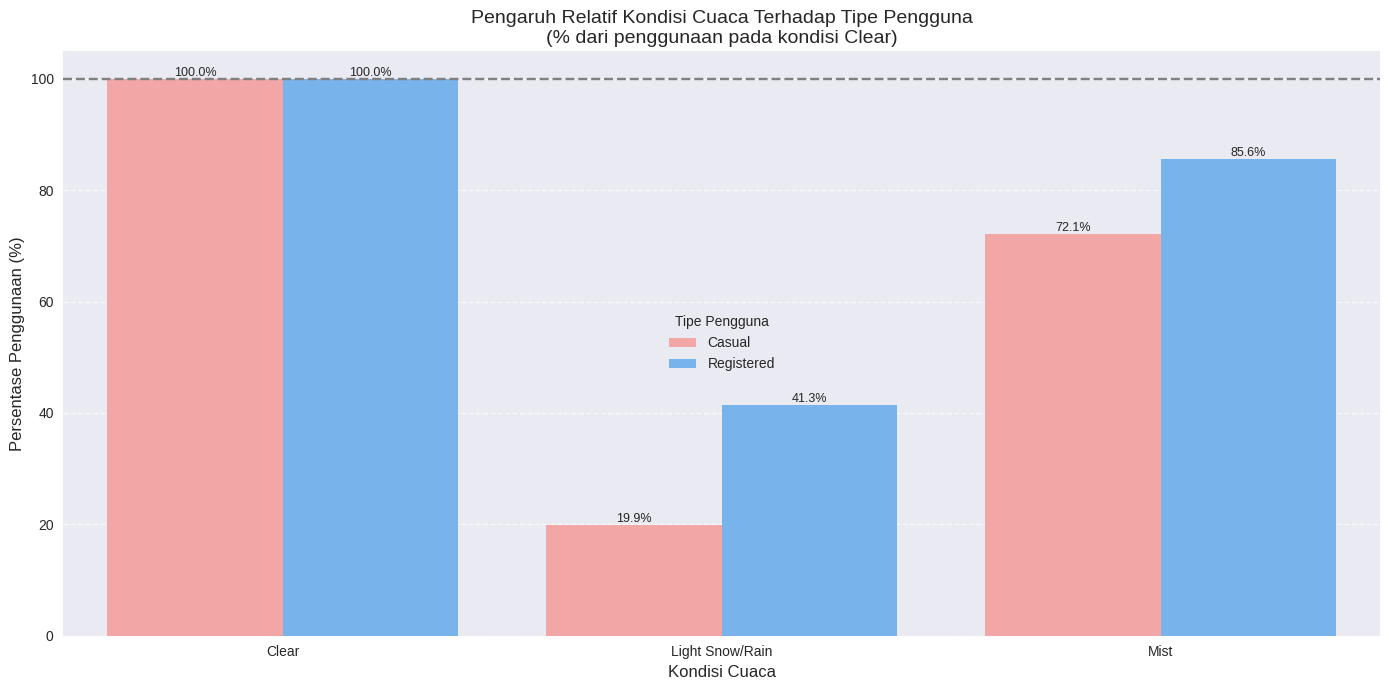

In [39]:
# Agregasi data berdasarkan musim untuk kedua tipe pengguna
season_user_type = day_df.groupby('season_name')[['casual', 'registered']].mean().reset_index()

# Visualisasi 1: Grouped bar chart untuk perbandingan musiman
plt.figure(figsize=(14, 7))
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_user_long = pd.melt(season_user_type,
                          id_vars='season_name',
                          value_vars=['casual', 'registered'],
                          var_name='user_type',
                          value_name='average_count')

ax = sns.barplot(x='season_name', y='average_count', hue='user_type', data=season_user_long,
               order=season_order, palette=['#ff9999', '#66b3ff'])
plt.title('Penggunaan Sepeda Berdasarkan Musim dan Tipe Pengguna', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Penggunaan', fontsize=12)
plt.legend(title='Tipe Pengguna')

# Menambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Agregasi data berdasarkan kondisi cuaca untuk kedua tipe pengguna
weather_user_type = day_df.groupby('weather_name')[['casual', 'registered']].mean().reset_index()
weather_user_type = weather_user_type.sort_values('weather_name')

# Visualisasi 2: Stacked bar chart untuk perbandingan berdasarkan cuaca
plt.figure(figsize=(14, 7))

# Menghitung persentase penurunan relatif terhadap kondisi "Clear"
clear_casual = weather_user_type.loc[weather_user_type['weather_name'] == 'Clear', 'casual'].values[0]
clear_registered = weather_user_type.loc[weather_user_type['weather_name'] == 'Clear', 'registered'].values[0]

weather_user_type['casual_percent'] = (weather_user_type['casual'] / clear_casual) * 100
weather_user_type['registered_percent'] = (weather_user_type['registered'] / clear_registered) * 100

# Membuat dataframe untuk visualisasi persentase
weather_percent_long = pd.melt(weather_user_type,
                             id_vars='weather_name',
                             value_vars=['casual_percent', 'registered_percent'],
                             var_name='user_type',
                             value_name='percent')

weather_percent_long['user_type'] = weather_percent_long['user_type'].map({
    'casual_percent': 'Casual',
    'registered_percent': 'Registered'
})

# Membuat bar chart persentase
ax = sns.barplot(x='weather_name', y='percent', hue='user_type', data=weather_percent_long,
               palette=['#ff9999', '#66b3ff'])
plt.title('Pengaruh Relatif Kondisi Cuaca Terhadap Tipe Pengguna\n(% dari penggunaan pada kondisi Clear)', fontsize=14)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Persentase Penggunaan (%)', fontsize=12)
plt.axhline(y=100, color='gray', linestyle='--')
plt.legend(title='Tipe Pengguna')

# Menambahkan nilai di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Pemilihan Diagram untuk Analisis Musim dan Cuaca:**

1. **Grouped Bar Chart untuk Analisis Musiman:**
   - **Perbandingan Kategorikal:** Bar chart dikelompokkan memungkinkan perbandingan langsung penggunaan casual dan registered untuk setiap musim.
   - **Urutan Intuitif:** Pengurutan musim secara kronologis (Spring -> Summer -> Fall -> Winter) memudahkan analisis pola siklik tahunan.
   - **Anotasi Nilai:** Nilai eksplisit di atas setiap bar memudahkan perbandingan kuantitatif antar kelompok dan musim.

2. **Bar Chart Persentase untuk Analisis Cuaca:**
   - **Perbandingan Relatif:** Menggunakan persentase relatif terhadap kondisi "Clear" memungkinkan analisis sensitifitas relatif kedua kelompok pengguna terhadap perubahan cuaca.
   - **Standarisasi:** Pendekatan ini menormalisasi perbedaan absolut jumlah pengguna, fokus pada efek proporsional dari kondisi cuaca.
   - **Garis Referensi:** Garis putus-putus pada 100% memberikan referensi visual untuk kondisi baseline (Clear).
   - **Format Persentase:** Menampilkan nilai sebagai persentase dengan simbol "%" memperjelas interpretasi.

Kombinasi kedua visualisasi memberikan insight tentang:
1. Perbedaan absolut penggunaan antar musim untuk kedua kelompok
2. Perbedaan sensitifitas relatif terhadap kondisi cuaca antara pengguna casual dan registered

**Insight dari Visualisasi Musim dan Cuaca:**
- Kedua kelompok pengguna menunjukkan preferensi musiman yang sama, dengan penggunaan tertinggi pada musim Summer dan Fall
- Pengguna casual menunjukkan variasi musiman yang lebih tinggi, dengan penurunan drastis pada musim Winter
- Pengguna casual lebih sensitif terhadap kondisi cuaca buruk dibandingkan pengguna registered
- Pada kondisi Light Snow/Rain, penggunaan casual turun hingga <40% dari kondisi Clear, sementara registered masih >50%
- Pola ini menegaskan bahwa pengguna registered cenderung tetap menggunakan sepeda terlepas dari kondisi eksternal, konsisten dengan perilaku komuter rutin